In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import files
files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv
Saving tatatest.csv to tatatest.csv


{'NSE-TATAGLOBAL.csv': b'Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)\n2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35\n2018-09-27,234.55,236.8,231.1,233.8,233.25,5082859,11859.95\n2018-09-26,240,240,232.5,235,234.25,2240909,5248.6\n2018-09-25,233.3,236.75,232,236.25,236.1,2349368,5503.9\n2018-09-24,233.55,239.2,230.75,234,233.3,3423509,7999.55\n2018-09-21,235,237,227.95,233.75,234.6,5395319,12589.59\n2018-09-19,235.95,237.2,233.45,234.6,234.9,1362058,3202.78\n2018-09-18,237.9,239.25,233.5,235.5,235.05,2614794,6163.7\n2018-09-17,233.15,238,230.25,236.4,236.6,3170894,7445.41\n2018-09-14,223.45,236.7,223.3,234,233.95,6377909,14784.5\n2018-09-12,216.35,223.7,212.65,221.65,222.65,4570939,10002.01\n2018-09-11,222.5,225.4,214.85,216.35,216,3508990,7735.81\n2018-09-10,222.5,235.15,220.65,221.05,222,7514106,17130.29\n2018-09-07,221,224.5,219.1,223.15,222.95,1232507,2742.84\n2018-09-06,224,225,218.2,220.95,221.05,1738824,3856.72\n2018-09-05,222,224.6,215.2,222.

In [30]:
data=pd.read_csv('NSE-TATAGLOBAL.csv')
data_train=data.iloc[:,1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Data Analysis**

In [31]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [32]:
data.shape

(2035, 8)

**Data visualization**

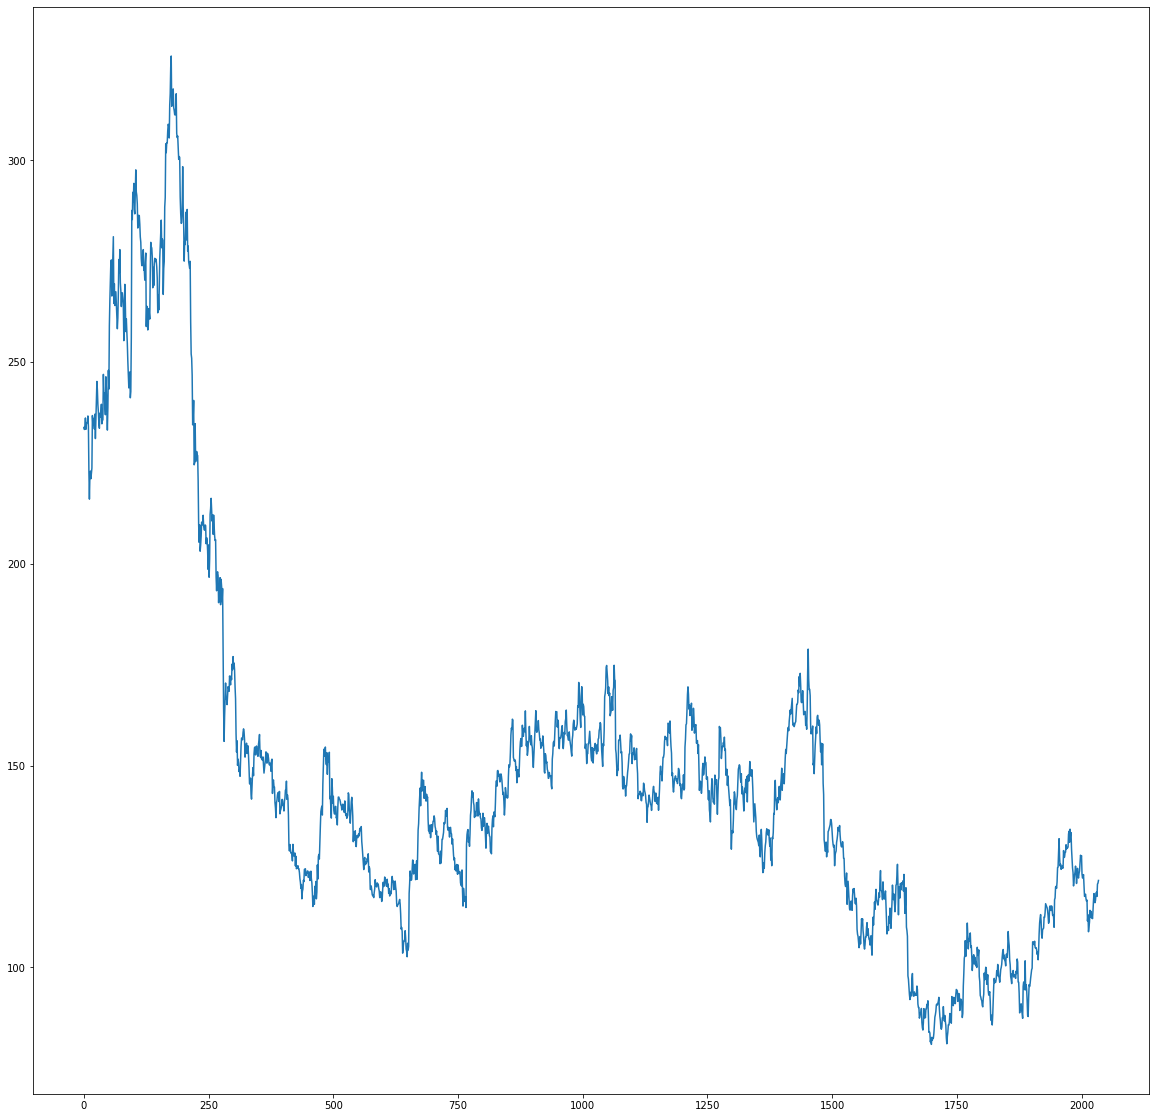

In [33]:
plt.figure(figsize=(20,20))
plt.plot(data["Close"],label='Closing price')

<BarContainer object of 2035 artists>

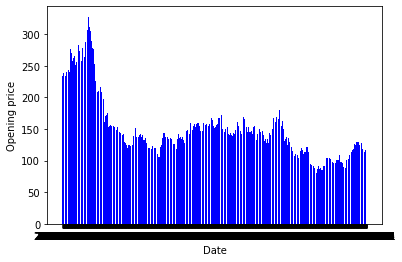

In [34]:
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.bar(data['Date'],data['Open'],color='blue')

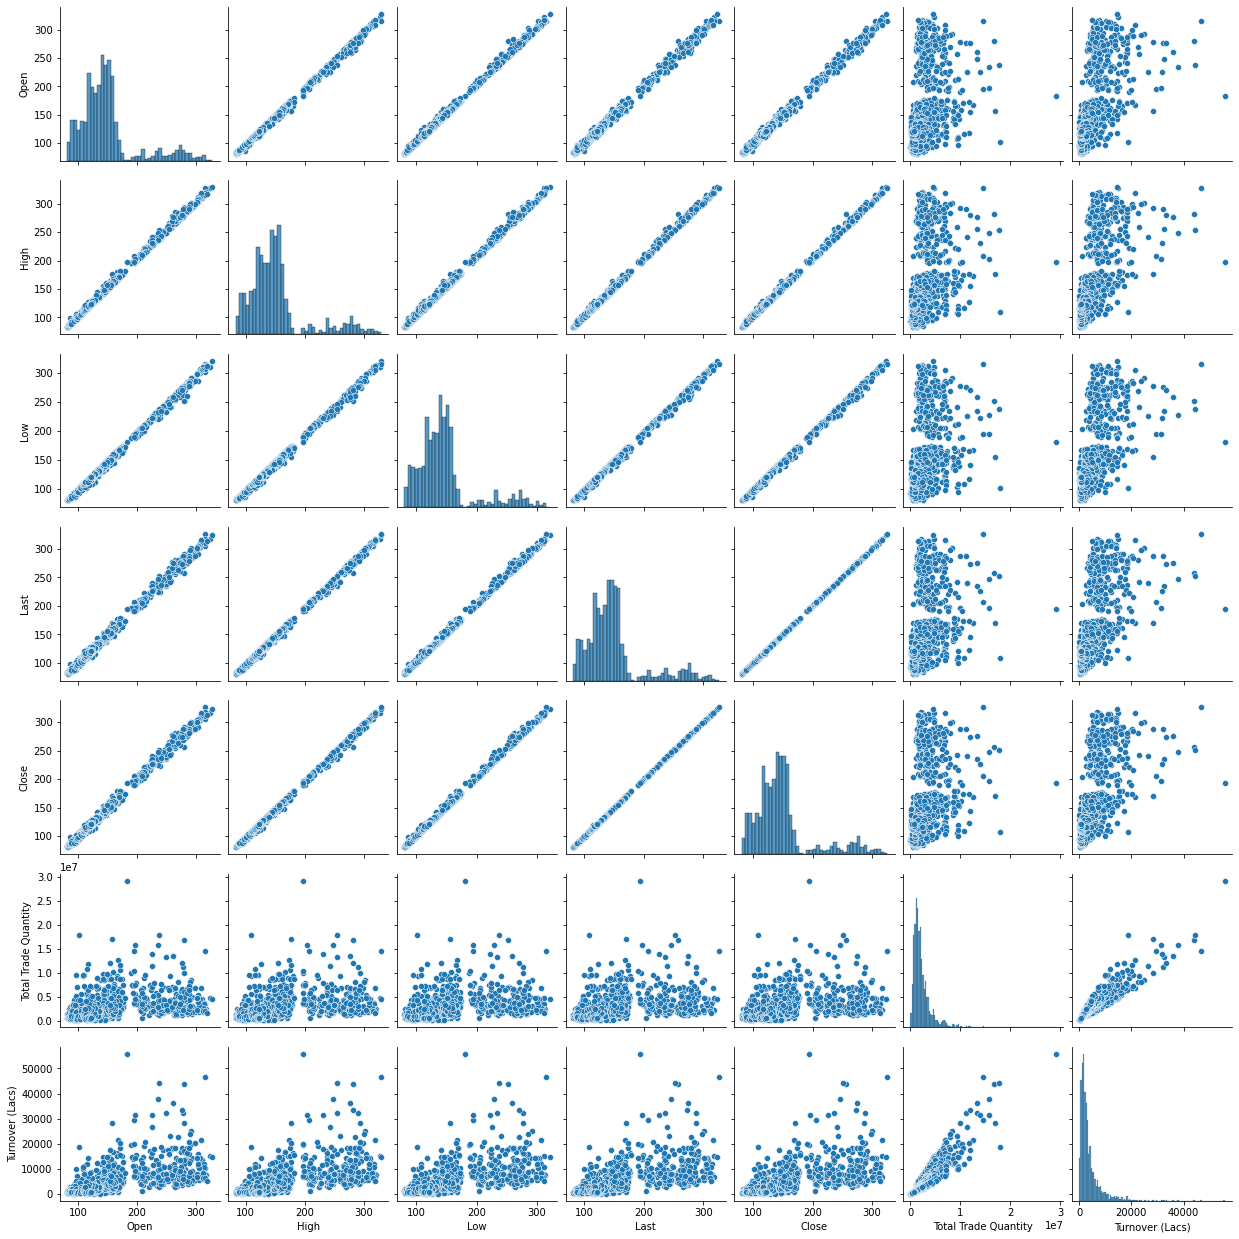

In [35]:
sb.pairplot(data,palette='Blues')

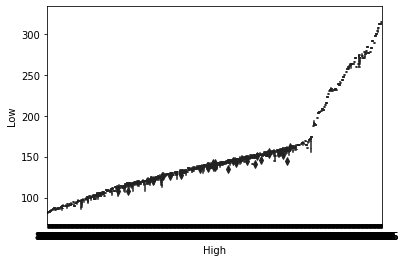

In [36]:
sb.boxplot(x='High',y='Low',data=data,palette='Blues')

**Feature Scaling**

In [37]:
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(data_train)

**Creating Data with Timesteps (
TimeSteps are ticks of time. It is how long in time each of your samples is. For example, a sample can contain 128-time steps, where each time steps could be a 30th of a second for signal processing.)**
 
LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

In [39]:
X_train,y_train=[],[]

for i in range(60,2035):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Build LSTM**

1)Sequential for initializing the neural network

2)Dense for adding a densely connected neural network layer

3)LSTM for adding the Long Short-Term Memory layer

4)Dropout for adding dropout layers that prevent overfitting

We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the following arguments:

1)**50 units** which is the dimensionality of the output space

2)**return_sequences=True** which determines whether to return the last output in the output sequence, or the full sequence

3)**input_shape** as the shape of our training set.

When defining the **Dropout layers**, we specify 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the **Dense layer** that specifies the output of 1 unit. After this, we compile our model using the popular **adam optimizer** and set the loss as the **mean_squarred_error**. This will compute the mean of the squared errors. Next, we fit the model to run on 100 epochs with a batch size of 32. Keep in mind that, depending on the specs of your computer, this might take a few minutes to finish running.



In [40]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
62/62 [==============================] - 14s 120ms/step - loss: 0.0115
Epoch 2/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0026
Epoch 3/10
62/62 [==============================] - 8s 122ms/step - loss: 0.0028
Epoch 4/10
62/62 [==============================] - 7s 120ms/step - loss: 0.0027
Epoch 5/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0025
Epoch 6/10
62/62 [==============================] - 7s 120ms/step - loss: 0.0024
Epoch 7/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0020
Epoch 8/10
62/62 [==============================] - 8s 122ms/step - loss: 0.0021
Epoch 9/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0020
Epoch 10/10
62/62 [==============================] - 7s 119ms/step - loss: 0.0020


**Predicting Future Stock by using the Testing data**

In order to predict future stock prices we need to do a couple of things after loading in the test set:

1)Merge the training set and the test set on the 0 axis.

2)Set the time step as 60.

3)Use MinMaxScaler to transform the new dataset.

4)Reshape the dataset as done previously.

After making the predictions we use **inverse_transform** to get back the stock prices in normal readable format.



In [41]:
df=pd.read_csv('tatatest.csv')
data_test=df.iloc[:,1:2].values
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [44]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)

IndexError: ignored

In [27]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()

NameError: ignored